# Autoencoders and diffusion models

Autoencoders are a type of artificial neural network used for unsupervised learning tasks, primarily designed for data compression and feature extraction or
dimensionality reduction. They work by learning a compressed representation (coding) of input data, which is then reconstructed (decoded) to resemble the 
original input. They can learn from dense representation of the input data (called __latent representations__ or __codings__). These type of models can 
also serve as generative models (which mean creating new data that looks similar to the fed input). GANs (__Generative Adverserial Networks__) are also a 
type of model capable of generating data; they can also be used for __super resolution__ which is increasing the resolution of an image, image editing, 
video generations and many other things. Recently diffusion models were also introduces for data generation but they are much slower when generating
data than the other types of models but produce more realistic data.
For autoencoders they simply learn to copy their inputs into their outputs for data generation but we can limit the size of the latent representations so that they don't simply do a direct copy of the inputs.  
For GANs, they are composed of 2 neural networks, one for data generation(the __generator__) and one that try to tell if the generated data is fake or not(the discriminator). In this chapter we will start by exploring in more depth how autoencoders work and how to use them for dimensionality reduction, 
feature extraction, unsupervised pretraining, or as generative models. 

## Latent representation

The best way to make model like autoencoders learn patterns is to constraints their latent representations to avoid them just memorizing the inputs and
regurgitating them onto us. For that an autoencoder is always composed of an encoder(a recognition network) and a decoder(the generator) that convert the
internal representations into outputs. It has the roughly the same architecture as a MultiLayer Perceptron but it have to possess the same number of 
output neurons as number of inputs(the outputs are called __reconstructions__). The cost function contains a reconstruction loss that penalizes the
model when the reconstructions are different from the inputs. Since the codings have a lower dimension than the inputs, we say that the autoencoder is
__undercomplete__. 

## Using PCA on an autoencoder for dimensionality reduction

If an autoencoder uses only linear activation functions and Mean Square Error as a loss function then it perform Principal Component Analysis. The following
code does just that:

In [2]:
import tensorflow as tf
import numpy as np

encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(2) # we don't need any activation function
])
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3)
])
autoencoder = tf.keras.Sequential([encoder, decoder])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss="mse", optimizer=optimizer)

# Let's train it on a 3 dimensional dataset and reduce it dimension in 2d
num_samples = 100
X = np.random.rand(num_samples, 3)

history = autoencoder.fit(X, X, epochs=500, verbose=False)
codings = encoder.predict(X)


print(codings)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[-0.51402855  0.40178806]
 [-0.07584348  0.6515352 ]
 [-0.65456545  0.29045528]
 [-0.24135691  0.6773104 ]
 [-0.04588397  0.42948836]
 [-0.20626706  0.3127783 ]
 [-0.48830357  0.5082006 ]
 [-0.28805628  0.20240325]
 [ 0.23080003  0.02229199]
 [-0.31067926  0.59915465]
 [-0.15120903 -0.07917121]
 [-0.02919768 -0.33619013]
 [-0.08029459  0.50099474]
 [ 0.19316758  0.01945537]
 [ 0.04714207  0.2276603 ]
 [-0.40481296 -0.24069268]
 [-0.22260985  0.22654271]
 [-0.35897988  0.2506333 ]
 [ 0.1639066   0.82535726]
 [-0.17209736  0.06048852]
 [-0.656935    0.28082424]
 [-0.7340033   0.22838944]
 [-0.13676214  0.5872074 ]
 [ 0.02177909 -0.40145227]
 [-0.1455527   0.38571197]
 [-0.48876968  0.40292752]
 [-0.34744087  0.21637166]
 [-0.2507351   0.52607304]
 [ 0.35460773  0.31003422]
 [-0.03346239  0.5438054 ]
 [-0.06129803  0.508063  ]
 [-0.49835292  0.6380847 ]
 [-0.40987483  0.29697466]
 [ 0.13391262  0.29132515]
 [-0.18104908  0.08245587]
 [-0.30060017  0.

## Stacked autoencoders

Autoencoders, like any other neural network model, can have multiple layers. When they do, they are referred to as __stacked autoencoders__. Adding more layers allows the model to learn more complex codings, capturing intricate patterns in the data. However, this increased complexity comes with a risk: the model might become too powerful and start overfitting the training data. Overfitting occurs when the model learns the noise and details in the training data to the extent that it performs poorly on new, unseen data.

A typical stacked autoencoder is usually symmetrical around its central hidden layer. This symmetry helps in maintaining a balanced architecture, ensuring that the encoding and decoding processes are equally complex. The central hidden layer, often referred to as the bottleneck layer, is crucial as it holds the compressed representation of the input data.

Here is an implementation of a stacked autoencoder using TensorFlow and Keras. The encoder compresses the input data into a lower-dimensional representation, and the decoder reconstructs the original data from this compressed representation. The model is trained to minimize the reconstruction loss, which measures the difference between the input data and its reconstruction.


In [ ]:
(X, _), (_, _) = tf.keras.datasets.mnist.load_data()

X = X.astype("float32") / 255.0


stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu")
])
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])

stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="mse", optimizer="nadam")
history = stacked_ae.fit(X, X, epochs=20, validation_data=(X[80:], X[80:]))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - loss: 0.0375 - val_loss: 0.0228
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - loss: 0.0221 - val_loss: 0.0208
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 0.0206 - val_loss: 0.0198
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - loss: 0.0195 - val_loss: 0.0188
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - loss: 0.0187 - val_loss: 0.0180
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - loss: 0.0180 - val_loss: 0.0176
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 55ms/step - loss: 0.0175 - val_loss: 0.0173
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.0173 - val_loss: 0.0171
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - loss: 0.0171 - val_loss: 0.0168
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - loss: 0.0169 - val_loss: 0.0167
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.0167 - val_loss: 0.0165
Epoch 1

### Tying weights

When an autoencoder is symmetrical one way to speed up training and reduce overfitting is to tie the weights of the decoder to the weights of the encoder
effectively halving the number of weights in the model. To do that we can create a custom layer:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

class DenseTranspose(layers.Layer):
    """
    A custom Keras layer that performs the transpose of a dense (fully connected) layer.
    This layer takes an existing dense layer and applies its weights in a transposed manner.
    It also allows for an optional activation function to be applied to the output.
    Attributes:
        dense (tf.keras.layers.Dense): The dense layer whose weights are to be transposed.
        activation (callable): The activation function to apply to the output. If None, no activation is applied.
        biases (tf.Variable): The biases for the transposed dense layer.
    Methods:
        build(batch_input_shape):
            Creates the biases variable for the transposed dense layer.
        call(inputs):
            Performs the forward pass of the layer, applying the transposed weights and biases, 
            and then the activation function if specified.
    Args:
        dense (tf.keras.layers.Dense): The dense layer whose weights are to be transposed.
        activation (str or callable, optional): The activation function to apply to the output. 
                                                Defaults to None.
        **kwargs: Additional keyword arguments to pass to the parent class.
    """
    def __init__(self, dense, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.dense = dense
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", shape=self.dense.input_shape[-1], initializer="zeros")
        super().build(batch_input_shape)

    def call(self, inputs):
        Z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(Z + self.biases)
    
# Now we can build an autoencoder with the weights of the decoder tied to the weights of the encoder
dense_1 = layers.Dense(100, activation="relu")
dense_2 = layers.Dense(30, activation="relu")

tied_encoder = tf.keras.Sequential([
    layers.Flatten(),
    dense_1,
    dense_2
])

tied_decoder = tf.keras.Sequential([
    DenseTranspose(dense_2, activation="relu"),
    DenseTranspose(dense_1),
    layers.Reshape([28, 28])
])

tied_ae = tf.keras.Sequential([tied_encoder, tied_decoder])

## Sparse Autoencoder

Another kind of constraint that often leads to good feature extraction is sparsity: by adding an appropriate term to the cost function, the autoencoder is pushed to reduce the number of active neurons in the coding layer. For example, it may be pushed to have on average only 5% significantly active neurons in the coding layer. This forces the autoencoder to represent each input as a combination of a small number of activations. As a result, each neuron in the coding layer typically ends up representing a useful feature (if you could speak only a few words per month, you would probably try to make them worth listening to).

### Theory Behind Sparse Autoencoders

Sparse autoencoders introduce sparsity constraints on the hidden units during training. This means that only a small number of neurons are allowed to be active (i.e., have non-zero output) at the same time. This sparsity constraint can be enforced by adding a regularization term to the loss function, which penalizes the activation of the hidden units.

#### Sparsity Regularization

The regularization term typically used to enforce sparsity is based on the Kullback-Leibler (KL) divergence, which measures the difference between two probability distributions. In the context of sparse autoencoders, the KL divergence is used to measure the difference between the average activation of the hidden units and a desired sparsity level.

The KL divergence between two Bernoulli random variables with probabilities \( ${\rho}$ \) and \( ${\hat{\rho}}$ \) is given by:

$${KL(\rho \| \hat{\rho}) = \rho \log \frac{\rho}{\hat{\rho}} + (1 - \rho) \log \frac{1 - \rho}{1 - \hat{\rho}}}$$

where:
- \( ${\rho}$ \) is the desired average activation (sparsity parameter, typically a small value like 0.05).
- \( ${\hat{\rho}}$ \) is the actual average activation of the hidden units.

The sparsity regularization term added to the loss function is:

$${\Omega = \sum_{j=1}^{n} KL(\rho \| \hat{\rho}_j)}$$

where \( _n_ \) is the number of hidden units and \( ${\hat{\rho}_j}$ \) is the average activation of the \( _j_ \)-th hidden unit over the training set.

#### Total Loss Function

The total loss function for training a sparse autoencoder is a combination of the reconstruction loss and the sparsity regularization term:

$${ \mathcal{L} = \mathcal{L}_{\text{reconstruction}} + \beta \Omega}$$

where:
- \( ${\mathcal{L}_{\text{reconstruction}}}$ \) is the reconstruction loss (e.g., mean squared error between the input and the reconstructed output).
- \( ${\beta}$ \) is a hyperparameter that controls the weight of the sparsity regularization term.

### Benefits of Sparse Autoencoders

1. **Feature Extraction**: Sparse autoencoders can learn useful features from the data, as the sparsity constraint forces the model to represent each input using a small number of active neurons.
2. **Interpretability**: The learned features are often more interpretable, as each neuron in the coding layer tends to represent a distinct feature.
3. **Robustness**: Sparse representations are more robust to noise and variations in the input data, as the model relies on a small number of significant features.

### Practical Implementation

In practice, implementing a sparse autoencoder involves defining the architecture of the encoder and decoder, adding the sparsity regularization term to the loss function, and training the model using an optimization algorithm.

Here is an example implementation of a sparse autoencoder using TensorFlow and Keras:

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 0.5101 - val_loss: 0.2591
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.2565 - val_loss: 0.2494
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.2491 - val_loss: 0.2466
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2462 - val_loss: 0.2440
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.2436 - val_loss: 0.2422
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2430 - val_loss: 0.2414
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2421 - val_loss: 0.2409
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.2416 - val_loss: 0.2403
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.2409 - val_loss: 0.2398
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.2405 - val_loss: 0.2394
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.2402 - val_loss: 0.2390
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━

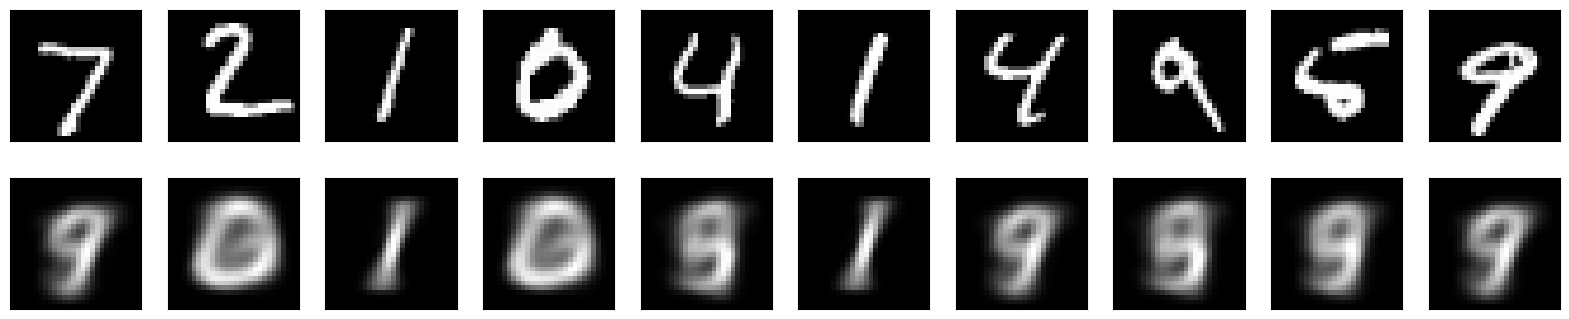

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import numpy as np

# Load the MNIST dataset
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

input_img = tf.keras.Input(shape=(28, 28))
x = layers.Flatten()(input_img)
x = layers.Dense(128, activation='relu', activity_regularizer=regularizers.l1(1e-4))(x)
encoded = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(28 * 28, activation='sigmoid')(x)
decoded = layers.Reshape((28, 28))(decoded)

autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

encoded_imgs = autoencoder.predict(X_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display the original and reconstructed images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1, label="Originals")
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n, label="Reconstructions")
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional autoencoders

If we want to use autoencoders for images, we can use convolutional autoencoders. Like a regular CNN, the encoder is composed of convolutional layers and pooling layers. The encoder typically reduces the dimensions of the input (the width and the height of the images) but increases the number of feature maps. This process helps in capturing the essential features of the input image while reducing its spatial dimensions.

The decoder, on the other hand, should perform the reverse operation: it should upscale the image and reduce its depth. This can be achieved using transpose convolutional layers (also known as deconvolutional layers) or a combination of upsampling layers with convolutional layers. The goal of the decoder is to reconstruct the original image from the compressed representation generated by the encoder.
1. **Encoder**:
    - **Convolutional Layers**: These layers apply convolution operations to the input image, extracting features such as edges, textures, and patterns. Each convolutional layer typically uses multiple filters to capture different aspects of the input image.
    - **Pooling Layers**: These layers reduce the spatial dimensions of the feature maps generated by the convolutional layers. Pooling helps in reducing the computational complexity and the number of parameters in the network. Common pooling operations include max pooling and average pooling.

2. **Decoder**:
    - **Transpose Convolutional Layers**: These layers perform the reverse operation of convolutional layers. They upsample the feature maps, increasing their spatial dimensions. Transpose convolutional layers help in reconstructing the original image from the compressed representation.
    - **Upsampling Layers**: These layers increase the spatial dimensions of the feature maps by repeating the values of the feature maps or using interpolation methods. Upsampling layers are often followed by convolutional layers to refine the upsampled feature maps.

Here is an example implementation of a convolutional autoencoder using TensorFlow and Keras:


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 127ms/step - loss: 0.5454 - val_loss: 0.2615
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - loss: 0.2584 - val_loss: 0.2273
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - loss: 0.2317 - val_loss: 0.2151
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 140ms/step - loss: 0.2048 - val_loss: 0.1870
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - loss: 0.1866 - val_loss: 0.1823
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - loss: 0.1794 - val_loss: 0.1757
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - loss: 0.1773 - val_loss: 0.1688
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - loss: 0.1662 - val_loss: 0.1730
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - loss: 0.1732 - val_loss: 0.1612
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - loss: 0.1745 - val_loss: 0.1735
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - loss: 0.1622 - val_loss: 0.1511
Epoch 12/50
235/235

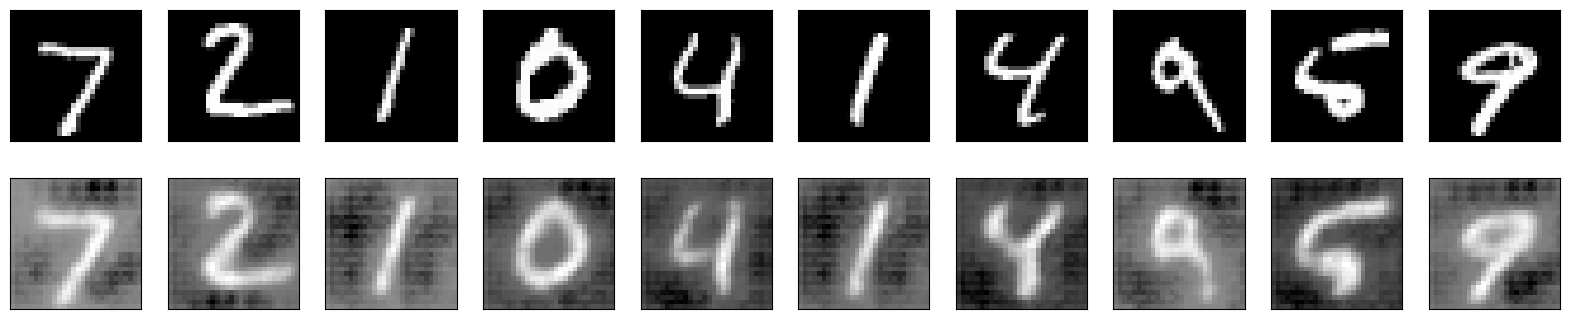

In [8]:
conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1]),
    tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(30, 3, padding="same", activation="relu"),
    tf.keras.layers.GlobalAvgPool2D()
])

conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3 * 3 * 16),
    tf.keras.layers.Reshape((3, 3, 16)),
    tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation="relu"),
    tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same", activation="relu"),
    tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same"),
    tf.keras.layers.Reshape([28, 28])
])

conv_ae = tf.keras.Sequential([conv_encoder, conv_decoder])
conv_ae.compile(optimizer='adam', loss='binary_crossentropy')
history = conv_ae.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

encoded_imgs = conv_encoder.predict(X_test)
decoded_imgs = conv_decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1, label="Original")
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n, label="Reconstructions")
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Another way to force autoencoders to learn patterns is to add noise to images and ask it to denoise them. Here is an implementation of such autoencoder:

In [ ]:
dropout_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu")
])

dropout_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])

dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])

## Variational Autoencoders

Variational Autoencoders (VAEs) are a type of generative model that are particularly popular for their ability to generate new data points that resemble the training data. Unlike traditional autoencoders, VAEs are probabilistic, meaning their outputs are partly determined by chance. This probabilistic nature allows VAEs to generate diverse outputs from the same input.

1. **Generative Autoencoders**: VAEs are generative models, meaning they can generate new instances that look like they were sampled from the training set. This is achieved by learning the underlying distribution of the data.

2. **Variational Bayesian Inference**: VAEs perform variational Bayesian inference, which is an approximation of Bayesian inference. Bayesian inference involves updating a probability distribution based on new data using Bayes' theorem. The original distribution is called the _prior_, while the updated distribution is called the _posterior_.

3. **Latent Space**: Instead of directly producing a coding of a given input, VAEs produce a mean coding $\mathbf{\mu}$ and a standard deviation $\mathbf{\sigma}$. The actual coding is then sampled randomly from a Gaussian distribution with mean $\mathbf{\mu}$ and standard deviation $\mathbf{\sigma}$. This allows the model to generate diverse outputs.

### Loss Function

The loss function of a VAE is composed of two parts:

1. **Reconstruction Loss**: This part of the loss function pushes the autoencoder to generate instances that are close to the inputs. It is typically measured using mean squared error (MSE) or binary cross-entropy.

2. **Latent Loss (KL Divergence)**: This part of the loss function pushes the autoencoder to have codings that look as if they were sampled from a simple Gaussian distribution. The latent loss can be computed using the following equation:

$$\mathbf{L} = -\frac{1}{2}\sum_{i=1}^{n}[1 + \log(\sigma _i^2) - \sigma _i^2 - \mu _i^2] $$

Where:
- __n__ is the dimensionality of the coding.
- $\mu _i$ is the mean of the coding of the $i^{th}$ instance in the dataset.
- $\sigma _i$ is the standard deviation of the $i^{th}$ instance.

A common variation to this equation is to make the encoder output $\gamma = \log(\sigma ^2)$ to speed up training:

$$\mathbf{L} = -\frac{1}{2}\sum _{i=1}^{n}(1 + \gamma _i - \exp(\gamma _i) - \mu _i^2)$$

### Implementation

To implement a VAE, we need a custom layer to sample a coding given the parameters. This layer will take the mean and log variance as inputs and output a sampled coding. We will then build the VAE using the Fashion MNIST dataset.

In [12]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

Now we can create the model using the subclassing API since it is not really a sequential model we cannot use the `Sequential` class to build it.

In [13]:
import tensorflow as tf
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - kl_loss: 2.6510 - loss: 293.2657 - reconstruction_loss: 290.6146 - val_loss: 0.3138
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - kl_loss: 3.0628 - loss: 240.8739 - reconstruction_loss: 237.8111 - val_loss: 0.2990
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - kl_loss: 2.9577 - loss: 232.9483 - reconstruction_loss: 229.9906 - val_loss: 0.2917
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - kl_loss: 2.8706 - loss: 228.4128 - reconstruction_loss: 225.5422 - val_loss: 0.2874
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - kl_loss: 2.8024 - loss: 225.7357 - reconstruction_loss: 222.9333 - val_loss: 0.2850
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - kl_loss: 2.7521 - loss: 223.7572 - reconstruction_loss: 221.0051 - val_loss: 0.2828
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - kl_loss: 2.7185 - loss: 222.2401 - reconstruction_loss: 219.5216 - val_loss: 0.2810
Epoch 8/50
215/215 ━━━━━━━━

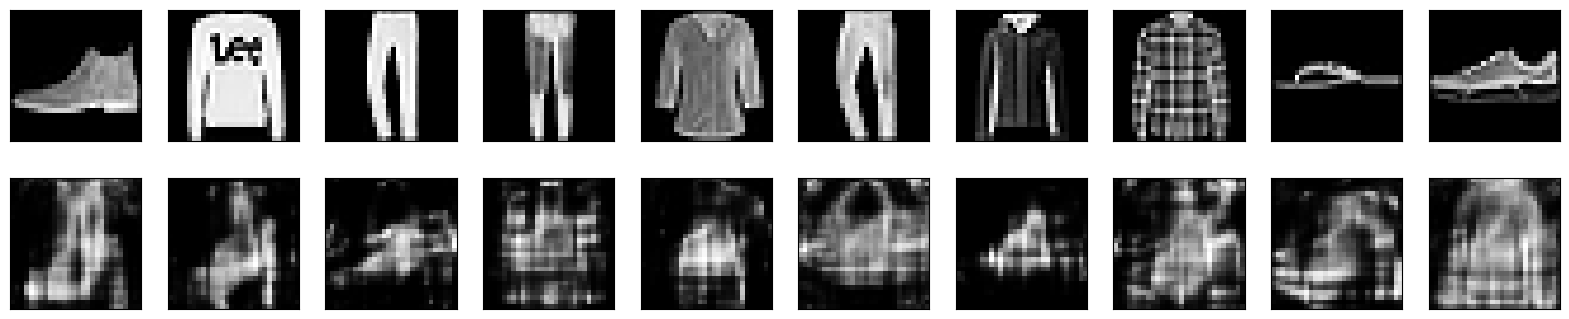

In [18]:
inputs = tf.keras.layers.Input(shape=(28, 28))
# Define the encoder
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
z_mean = tf.keras.layers.Dense(64)(x)
z_log_var = tf.keras.layers.Dense(64)(x)
z = Sampling()([z_mean, z_log_var])

# Define the decoder
decoder_input = tf.keras.layers.Input(shape=(64,))
x = tf.keras.layers.Dense(128, activation='relu')(decoder_input)
x = tf.keras.layers.Dense(28 * 28, activation='sigmoid')(x)
outputs = tf.keras.layers.Reshape((28, 28))(x)
decoder = tf.keras.Model(decoder_input, outputs)

class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = Sampling()([z_mean, z_log_var])
        reconstructed = self.decoder(z)
        return reconstructed

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = Sampling()([z_mean, z_log_var])
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= 28 * 28
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {"loss": total_loss, "reconstruction_loss": reconstruction_loss, "kl_loss": kl_loss}

# Create the VAE model
encoder = tf.keras.Model(inputs, [z_mean, z_log_var])
vae = VAE(encoder, decoder)

# Compile and train the VAE
vae.compile(optimizer='adam', loss='binary_crossentropy')
vae.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_valid, X_valid))

# Plot generated images

# Generate new fashion images
import matplotlib.pyplot as plt

def plot_generated_images(model, n_images=10):
    random_latent_vectors = np.random.normal(size=(n_images, 64))
    generated_images = model.predict(random_latent_vectors)
    
    plt.figure(figsize=(20, 4))
    for i in range(n_images):
        # Display original
        ax = plt.subplot(2, n_images, i + 1)
        plt.imshow(X_test[i], cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # Display generated
        ax = plt.subplot(2, n_images, i + 1 + n_images)
        plt.imshow(generated_images[i], cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

plot_generated_images(vae.decoder)

## Generative Adversarial Networks (GANs)

Generative Adversarial Networks (GANs) are a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in 2014. The core idea behind GANs is to train two neural networks simultaneously through a process of competition, which is expected to improve their performance. These two models are known as the __generator__ and the __discriminator__.

### Generator

The generator's role is to create data that is similar to the real data. It takes a random noise vector (sampled from a predefined distribution, typically Gaussian) as input and transforms it into a data sample (e.g., an image). The generator's objective is to produce data that is indistinguishable from real data, thereby "fooling" the discriminator.

### Discriminator

The discriminator's role is to distinguish between real data (from the training dataset) and fake data (produced by the generator). It takes a data sample as input and outputs a probability value indicating whether the input is real or fake. The discriminator's objective is to correctly classify real and fake data samples.

### Training Process

Training a GAN involves a two-step process:

1. **Training the Discriminator**: 
    - The discriminator is trained on a batch of real data samples from the training dataset, labeled as real (1).
    - It is also trained on a batch of fake data samples generated by the generator, labeled as fake (0).
    - The discriminator's weights are updated to minimize the classification error, i.e., to correctly distinguish between real and fake samples.

2. **Training the Generator**:
    - The generator is trained to produce data samples that can fool the discriminator.
    - During this step, the discriminator's weights are frozen (i.e., not updated) to ensure that only the generator's weights are updated.
    - The generator's objective is to maximize the discriminator's error, i.e., to generate samples that the discriminator classifies as real.

### Loss Functions

- **Discriminator Loss**: Measures how well the discriminator can distinguish between real and fake samples. It is typically computed as the binary cross-entropy loss between the predicted labels and the true labels.
- **Generator Loss**: Measures how well the generator can fool the discriminator. It is typically computed as the binary cross-entropy loss between the discriminator's predictions for the generated samples and the label indicating real samples.

### Implementation process

The following steps outline the implementation process:

1. **Define the Generator and Discriminator Models**:
    - The generator model takes a random noise vector as input and outputs a 28x28 image.
    - The discriminator model takes a 28x28 image as input and outputs a probability indicating whether the image is real or fake.

2. **Compile the Models**:
    - Compile the discriminator with a binary cross-entropy loss and an optimizer (e.g., RMSprop).
    - Compile the GAN model (which combines the generator and discriminator) with a binary cross-entropy loss and an optimizer (e.g., RMSprop).

3. **Train the GAN**:
    - Train the discriminator on real and fake samples.
    - Train the generator to produce samples that can fool the discriminator.

By following these steps, we aim to train a GAN that can generate realistic fashion images similar to those in the Fashion MNIST dataset.

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step 
0 [D loss: 0.606222927570343, acc.: 65.0390625%] [G loss: [array(0.6319808, dtype=float32), array(0.6319808, dtype=float32), array(0.62109375, dtype=float32)]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/

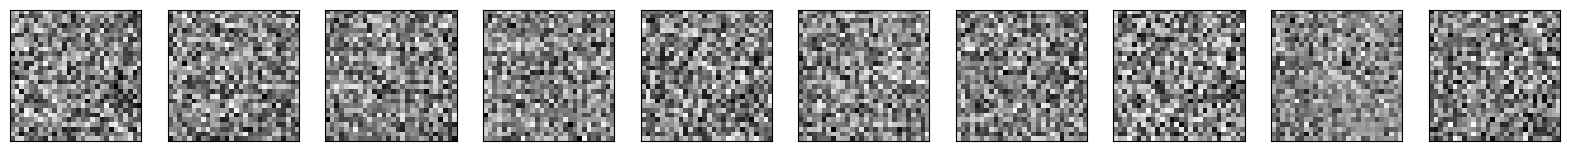

In [35]:
generator = tf.keras.Sequential()
# Define the generator model
generator.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(100,)))
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.Dense(512, activation='relu'))
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.Dense(1024, activation='relu'))
generator.add(tf.keras.layers.BatchNormalization())
generator.add(tf.keras.layers.Dense(28 * 28, activation='tanh'))
generator.add(tf.keras.layers.Reshape((28, 28, 1)))

# Define the discriminator model
discriminator = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Combine the generator and discriminator into a GAN
discriminator.trainable = False
gan_input = tf.keras.layers.Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)

# Compile the GAN
gan.compile(optimizer='adam', loss='binary_crossentropy')

(X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=-1) 

# Define training parameters
batch_size = 128
epochs = 50
sample_interval = 5

# Training the GAN
for epoch in range(epochs):
    # Train the discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_images = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_images = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print the progress
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

# Generate and display images
import matplotlib.pyplot as plt

def plot_generated_images(generator, n_images=10):
    noise = np.random.normal(0, 1, (n_images, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]

    plt.figure(figsize=(20, 4))
    for i in range(n_images):
        ax = plt.subplot(1, n_images, i + 1)
        plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

plot_generated_images(generator)

During training, GANs may reach a state called __Nash equilibrium__, where both the generator and the discriminator wouldn't improve if they changed their strategy, assuming the other one doesn't change theirs. This means that the generator produces perfectly realistic images, and the discriminator is forced to guess 50% true and 50% fake. Reaching this equilibrium is the goal, but a common difficulty is __mode collapse__. Mode collapse occurs when the outputs of the generator become less diverse. For example, if the generator becomes good at generating a certain type of image, like shoes, it will fool the discriminator, which in turn will encourage the generator to generate more images of shoes. Eventually, the generator becomes less viable at generating other types of images.

A popular technique to mitigate mode collapse is called __experience replay__. This technique involves storing the images produced by the generator at each iteration in a replay buffer (gradually dropping older generated images) and training the discriminator using real images plus fake images drawn from this buffer (rather than just fake images produced by the current generator). This reduces the chances that the discriminator will overfit to the latest generator’s outputs.

Another common technique is called __mini-batch discrimination__. This technique measures how similar images are across the batch and provides this statistic to the discriminator, so it can easily reject a whole batch of fake images that lack diversity. This encourages the generator to produce a greater variety of images, reducing the chance of mode collapse.

## Deep Convolutional GANs

Researchers have developed a way to build stable deep convolutional GANs (DCGANs). The key architectural guidelines for DCGANs are:
- Replace any pooling layers with strided convolutions in the discriminator and with transposed convolutions in the generator. Pooling layers are typically used to reduce the spatial dimensions of feature maps, but strided convolutions can achieve the same effect while allowing the network to learn its own spatial downsampling.
- Use batch normalization in both the discriminator and the generator, except in the output layer of the generator and the input layer of the discriminator. Batch normalization helps stabilize training by normalizing the inputs to each layer, which can help prevent issues like vanishing or exploding gradients.
- Remove fully connected hidden layers. Fully connected layers can introduce a large number of parameters, which can make the network more prone to overfitting. Instead, using convolutional layers throughout the network can help maintain spatial information and reduce the number of parameters.
- Use ReLU activation in all layers in the generator except for the output layer, which should use tanh. ReLU activation functions are commonly used in deep learning because they help mitigate the vanishing gradient problem. The tanh activation function is used in the output layer to ensure that the generated images have pixel values in the range [-1, 1].
- Use LeakyReLU activation for all layers in the discriminator. LeakyReLU is a variant of the ReLU activation function that allows a small, non-zero gradient when the unit is not active. This can help prevent the "dying ReLU" problem, where units can become inactive and stop learning.

Here is an example implementation of a DCGAN on the Fashion MNIST dataset:


In [ ]:
import os
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from IPython import display

# Load the Fashion MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]
BUFFER_SIZE = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).prefetch(1)

def make_generator_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.LeakyReLU())

  model.add(tf.keras.layers.Reshape((7, 7, 256)))

  model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.LeakyReLU())

  model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.LeakyReLU())

  model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  return model

def make_discriminator_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                   input_shape=[28, 28, 1]))
  model.add(tf.keras.layers.LeakyReLU())
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  model.add(tf.keras.layers.LeakyReLU())
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(1))

  return model

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
generator = make_generator_model()
discriminator = make_discriminator_model()

checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                 discriminator_optimizer=discriminator_optimizer,
                 generator=generator,
                 discriminator=discriminator)

EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
  noise = tf.random.normal([BATCH_SIZE, noise_dim])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training=True)

    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def train(dataset, epochs):
  for epoch in range(epochs):   
    print(f'Time for epoch {epoch}/{epochs}')
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    display.clear_output(wait=True)
    generate_and_save_images(generator,
                 epoch + 1,
                 seed)

    if (epoch + 1) % 1 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

 

  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, seed)

def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')

  plt.show()

train(train_dataset, EPOCHS)


This model would produce fairly good images though but to produce larger images researchers suggests producing small images at the beggining of the 
generator and upsample the image progressively by adding more layers at the end of the generator and at the beggining of the discriminator. This technique
is called __Progressive GANs__.

## Diffusion models

Researchers found a way to generate very convincing images using diffusion models. Their core method is called __denoising diffusion probabilistic model (DDPM)__. These models are much easier to train than GANs and produce more diverse images. DDPM works as follows: suppose you have an image of a cat noted $\mathbf{x_0}$. At each time step _t_, we add a bit of Gaussian noise to it with mean 0 and variance $\beta _t$ (this noise is called __isotropic__). We obtain the images $x_1$, $x_2$, ..., until the cat is completely obscured by the noise (the last time step is noted T). This process is the _forward process_. The forward process is summarized in the following equation:
$$q(\mathbf{x}_t | \mathbf{x}_{t-1}) = \mathbf{N}(\sqrt{1 - \beta _t} \mathbf{x}_{t-1}, \beta _t \mathbf{I}) $$

Note that every pixel is rescaled at each time step by a value of $\sqrt{1 - \beta _t}$ to ensure that the mean of the pixel values gradually approaches 0, since the scaling factor is a bit smaller than 1. We can shorten this equation; there exists a way to compute an image $x_t$ given $x_0$ without having to compute $x_1$, $x_2$, ..., etc.:
$$q(\mathbf{x}_t | \mathbf{x}_0) = \mathbf{N}(\sqrt{\alpha _t} \mathbf{x}_0, (1 - \alpha _t) \mathbf{I}) $$

Now the goal of our model is to be able to reverse the process. The first thing we need to do is to code the forward process. For this, we will first need to implement the variance schedule. How can we control how fast the cat disappears? Initially, 100% of the variance comes from the original cat image. Then at each time step t, the variance gets multiplied by $1 - \beta _t$, as explained earlier, and noise gets added. So, the part of the variance that comes from the initial distribution shrinks by a factor of $1 - \beta _t$ at each step. If we define $\alpha = 1 - \beta$, then after t time steps, the cat signal will have been multiplied by a factor of $\bar{\alpha}_t = \prod_{i=1}^{t} \alpha_i$. It’s this “cat signal” factor $\bar{\alpha}$ that we want to schedule so it shrinks down from 1 to 0 gradually between time steps 0 and T.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, ReLU, BatchNormalization

(x_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

def normalize(x):
    x_normal = x.astype("float32") / 255.0
    x_normal = np.expand_dims(x_normal, axis=-1)
    return x_normal

x_train = normalize(x_train)

def forward_process(x, t, beta):
    alpha_t = np.prod(1 - beta[:t+1])
    noise = np.random.normal(0, 1, x.shape)
    return np.sqrt(alpha_t) * x + np.sqrt(1 - alpha_t) * noise

T = 1000
beta = np.linspace(0.0001, 0.02, T)

t = 100
x_t = forward_process(x_train[0], t, beta)

def build_model():
    """
    Builds a convolutional autoencoder model using Keras.
    
    Returns:
        model (tf.keras.Model): The constructed autoencoder model.
    """
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = ReLU()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = ReLU()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2DTranspose(128, (3, 3), padding='same')(x)
    x = ReLU()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2DTranspose(64, (3, 3), padding='same')(x)
    x = ReLU()(x)
    outputs = Conv2DTranspose(1, (3, 3), padding='same')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

model = build_model()
model.compile(optimizer='adam', loss='mse')

def train_model(model, x_train, beta, T, epochs=10, batch_size=32):
    for epoch in range(epochs):
        for i in range(0, len(x_train), batch_size):
            x_batch = x_train[i:i+batch_size]
            t = np.random.randint(1, T, size=(batch_size,))
            x_t = np.array([forward_process(x, t_i, beta) for x, t_i in zip(x_batch, t)])
            model.train_on_batch(x_t, x_batch)
        print(f"Epoch {epoch + 1}/{epochs} completed")

train_model(model, x_train, beta, T)

def generate_images(model, num_images, beta, T):
    generated_images = []
    for _ in range(num_images):
        x_t = np.random.normal(0, 1, (1, 28, 28, 1))
        for t in reversed(range(T)):
            x_t = model.predict(x_t)
            if t > 0:
                noise = np.random.normal(0, np.sqrt(beta[t]), x_t.shape)
                x_t += noise
        generated_images.append(x_t[0])
    return np.array(generated_images)

generated_images = generate_images(model, 10, beta, T)

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()